## Part 1: RNC and DNC Speech Analysis
* The RNC and DNC speeches are written with the intent to persuade an otherwise already persuaded audience.
    * For example, viewers of the RNC are typically republican: "More viewers tuned into Fox News to watch the final night of the Republican convention than any other TV network" (https://www.wsj.com/articles/rnc-ratings-final-night-draws-23-8-million-viewers-as-trump-accepts-nomination-11598652831)
* This analysis will include a classifier which will predict whether a test document is from a republican speaker or a democratic speaker. 
    * Goal: to see if the classifier will be able to recognize differences in the word choices of each group. Hypothesis: high accuracy. Also, see the top features.
* Additionally, I will include a model to see if the length of the speech, the length of the sentences, the TTR, etc. has any significance on predicting between republican and democratic speeches.

In [11]:
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns        # seaborn graphical package
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

In [12]:
conv_speeches = pd.read_csv("/Users/emmatarcson/Documents/data_science/RhetoricalFactor-analysis/data_sample/convspeeches.csv")
conv_speeches = conv_speeches[['Aff','Speech']]
conv_speeches.Aff.value_counts()

R    30
D    21
Name: Aff, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(conv_speeches['Speech'], conv_speeches['Aff'], random_state=0,
                                  train_size=0.6) 

In [14]:
vectorizer = TfidfVectorizer(min_df=1, max_features=4000, stop_words='english')

X_text_train = vectorizer.fit_transform(X_train)


In [15]:
X_text_test = vectorizer.transform(X_test)

In [16]:
from sklearn.svm import SVC 
svcmodel = SVC(kernel='linear', C=1E5)  
svcmodel.fit(X_text_train, y_train)

SVC(C=100000.0, kernel='linear')

In [17]:
pred = svcmodel.predict(X_text_test)
print(y_test[:20])
print(pred[:20])

29    R
11    D
10    D
22    R
2     D
28    R
45    R
32    R
26    R
4     D
33    R
41    R
27    R
35    R
34    R
7     D
14    D
46    R
18    D
48    R
Name: Aff, dtype: object
['R' 'D' 'D' 'R' 'D' 'R' 'D' 'R' 'R' 'D' 'R' 'R' 'R' 'R' 'R' 'D' 'D' 'R'
 'D' 'R']


In [18]:
accuracy_score(y_test, pred)

0.9523809523809523

In [19]:
letsee = [x for x in pred if x == 'D']
len(letsee)

8

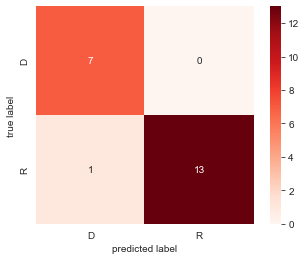

In [21]:
from sklearn.metrics import confusion_matrix
labels = ['D','R']
mat = confusion_matrix(y_test, pred, labels)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap="Reds",
           xticklabels=labels, yticklabels=labels)
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

* So there is one instance of it guessing Democratic, instead of Republican in the test set. 